<a href="https://colab.research.google.com/github/logicalschema/data620/blob/main/Week8/Data_620_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 620 Week 8 Assignment

[Github Link](https://github.com/logicalschema/data620/tree/main/Week8)

[YouTube Video](https://youtu.be/HqvhHvftVs4)  

<img src=https://github.com/logicalschema/data620/raw/main/Week8/data/bible.jpg width="200">


# Introduction
The purpose of this assignment is to look at the high frequency words for a corpus of interest. For this assignment, I selected the *NET Bible*. It is an English translation of the Bible. Additional information is available [here](https://netbible.com/about/).


# Data
The data was gathered by querying the API https://labs.bible.org/api_web_service and obtaining the 66 books of the NET Bible. Each book was obtained as plain text with chapter and verse numbers included. 



The code below sets up the environment.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import pandas as pd
from IPython.display import display_html
import nltk, re, pprint
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords


# Function that reads the text from an url
def readText(url):
	filetext = urllib.request.urlopen(url)
	text = filetext.read().decode('utf-8')
	return text

# Function tokenizer
# Tokenizes a text variable. Converts words to lowercase and removes stop words
def quickTokenizer(textVar):
  tokens = word_tokenize(textVar)

  # Lowercase the tokens
  tokens_l = [w.lower() for w in tokens if w.isalpha()]

  filtered = []

  for w in tokens_l:
    if w not in stop_words:
      filtered.append(w)

  return filtered

# Function for displaying dataframes side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Variable to keep track of figures
fig_no = 1


Additional downloads were needed for the `NLTK` library. `punkt` is the `NLTK` sentence tokenizer and `stopwords` which is used to obtain a list of classic stopwords for different languages. English has stopwords such as "the", "is", "in", etc that can be safely removed without losing meaning.

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The dataframe contains a list of Bible books and contains various attributes. The `Section` denotes if the book is in the Old or New Testament and `Genre` denotes if the book is `Narrative`, `Poetry`, `Wisdom`, `Prophecy`, `Gospel`, or `Epistle`. The field url contains the Github location of the book downloaded via the NET Bible API.

In [3]:
bible_df = pd.read_csv('https://raw.githubusercontent.com/logicalschema/data620/main/Week8/data/bible/biblebooks_df.csv', index_col=False)
bible_df.head(5)

,Book,Start,End,Section,Genre,url
0,Genesis,1:1,50:26,Old Testament,Narrative,https://raw.githubusercontent.com/logicalschem...
1,Exodus,1:1,40:38,Old Testament,Narrative,https://raw.githubusercontent.com/logicalschem...
2,Leviticus,1:1,27:34,Old Testament,Narrative,https://raw.githubusercontent.com/logicalschem...
3,Numbers,1:1,36:13,Old Testament,Narrative,https://raw.githubusercontent.com/logicalschem...
4,Deuteronomy,1:1,34:12,Old Testament,Narrative,https://raw.githubusercontent.com/logicalschem...


The variable `text_dict` is a dictionary that contains the full text of the Bible book.

In [4]:
text_dict = {}
for index, row in bible_df.iterrows():
	text_dict[row['Book']] = readText(row['url'])

An example of the `text_dict` variable calling 1 Corinthians.

In [6]:
print(text_dict['Luke'][0:150])

1:1 Now many have undertaken to compile an account of the things that have been fulfilled among us,   2 like the accounts passed on to us by those who


# Constructing the Corpus: the Entire Bible

Now, since we have the raw text, let's construct the corpus. This section will construct the entire Bible using all of the 66 books.




In [7]:
complete_bible = ""
for book in text_dict.keys():
  complete_bible = complete_bible + " " + text_dict[book]

corpus = quickTokenizer(complete_bible)


## Total Unique Words
My function `quickTokenizer` converts tokens to lowercase, removes stopwords and only considers words (removing punctuation and verse numbers). 

In [8]:
print("There are " + str(len(set(corpus))) + " unique words.")

There are 15534 unique words.


## Common Words
*Taking the most common words, how many unique words represent half of the total words in the corpus?*

Now, let's build a frequency table of the words in the corpus and then make a dataframe.

In [9]:
# Builds the frequency distribution using FreqDist()
freqBible = FreqDist(corpus)


## How many unique words represent half of the total words in the corpus?

The following will work through calculating the unique words that constitute at least half of the corpus. This will use a cummulative sum.

In [10]:
# The total number of words in the corpus 
totalWords = len(corpus)
uniqueWords = len(freqBible) 

print("There are " + str(totalWords) + " words in the corpus.")
print("Half of this number is " + str(totalWords/2) + ".")

There are 331114 words in the corpus.
Half of this number is 165557.0.


In [11]:
top = pd.DataFrame(freqBible.most_common(500),columns=['Word','Frequency'])
top['Relative Frequency'] = top['Frequency']/totalWords

index = 0
sum = 0
stop = totalWords / 2
words = []

# Develop a cummulative sum until the stop (half of the total words) is reached
while sum <= stop:
  sum = sum + top.iloc[index,1]
  words.append(top.iloc[index,0])
  index += 1


Working through the frequencies of the most common words, we reach the following:

In [12]:
print("The first " + str(index + 1) + " common words represent half of the corpus.")
top.head(index)

The first 367 common words represent half of the corpus.


,Word,Frequency,Relative Frequency
0,lord,7728,0.023339
1,god,4055,0.012247
2,one,3411,0.010302
3,said,3268,0.009870
4,people,2659,0.008030
...,...,...,...
361,bronze,162,0.000489
362,returned,162,0.000489
363,used,161,0.000486
364,officials,161,0.000486


## Top 200 Highest Frequency Words

Using the dataframe constructed above, we are able to quickly get the top 200 highest frequency words.

In [13]:
# Top 200 words exrapolated from the top dataframe
top200 = top.head(200)

# Top 10 and Bottom 10 of the top 200
display_side_by_side(top200.head(10), top200.tail(10) )


,Word,Frequency,Relative Frequency
0,lord,7728,0.023339
1,god,4055,0.012247
2,one,3411,0.010302
3,said,3268,0.009870
4,people,2659,0.008030
5,king,2558,0.007725
6,son,2281,0.006889
7,israel,1899,0.005735
8,must,1825,0.005512
9,land,1787,0.005397


## Graph of the Top 200

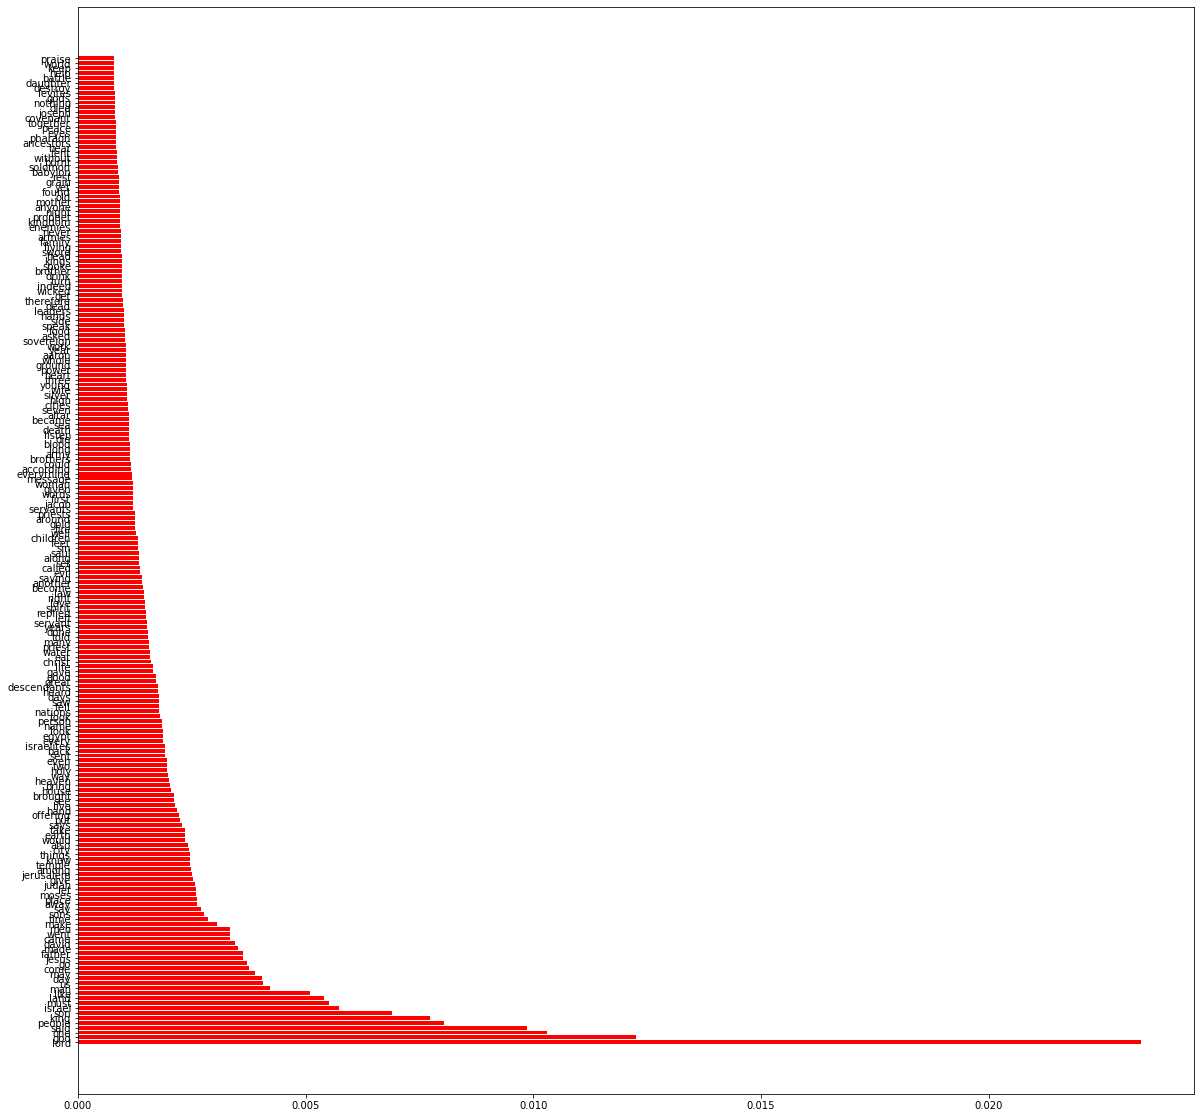

In [14]:
x = top200['Word'].tolist()
y = top200['Relative Frequency'].tolist()

plt.figure(fig_no,figsize=(20,20)) 
plt.barh(x, y, color='red', align='center')
plt.savefig('Figure' + str(fig_no) + '.png')
fig_no +=1

## Graph of the Top 20

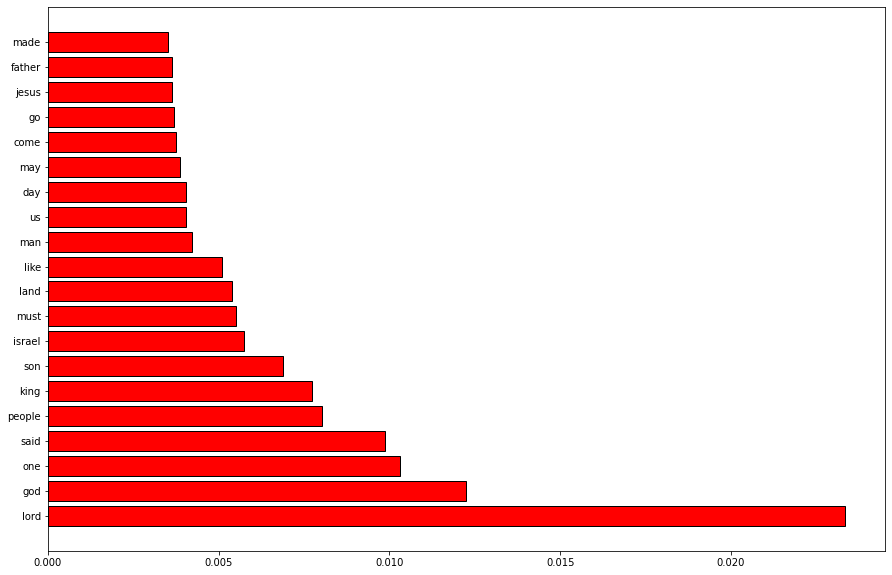

In [15]:
x = top200.head(20)['Word'].tolist()
y = top200.head(20)['Relative Frequency'].tolist()


plt.figure(fig_no,figsize=(15,10)) 
plt.barh(x, y, color='red', edgecolor='black')
plt.savefig('bar' + str(fig_no) + '.png')
fig_no +=1

# Zipf's Law

"**Zipf’s Law**: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf’s Law states that the frequency of a word type is inversely proportional to its rank (i.e., f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type." 

—*Natural Language Processing with Python (p. 128). O'Reilly Media. Kindle Edition.*




**Does the observed relative frequency of these words follow Zipf’s law?  Explain.**  

Yes, Zipf's Law can be observed in the relative frequencies of the common words. 





**In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”** The law holds for all corpora. For ways they would differ would be in the words being compared as they relate to their respective corpus. 


# Additional Work

This section looks at differences in common words of the NET Bible by section and genre.

## Section: Old and New Testament Common Words

Let's look at the differences, if any, of the Old and New Testaments in terms of frequency of words.


In [16]:
# Gather the book names of the different sections Old and New Testament
old_testament = bible_df[bible_df['Section'] == 'Old Testament']['Book'].tolist()
new_testament = bible_df[bible_df['Section'] == 'New Testament']['Book'].tolist()

print(old_testament)
print(new_testament)

['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges', 'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles', 'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalm', 'Proverbs', 'Ecclesiastes', 'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel', 'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk', 'Zephaniah', 'Haggai', 'Zechariah', 'Malachi']
['Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians', '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon', 'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude', 'Revelation']


### Build the Corpora

In [17]:
otText = ""
ntText = ""

for book in old_testament:
  otText = otText + text_dict[book] + " "

for book in new_testament:
  ntText = ntText + text_dict[book] + " "

otCorpus = quickTokenizer(otText)
ntCorpus = quickTokenizer(ntText)


### Build the Frequency Tables

In [18]:
otfreqBible = FreqDist(otCorpus)
ntfreqBible = FreqDist(ntCorpus)

### Top 10 Common Words for the Old and New Testaments




In [20]:
ot = pd.DataFrame(otfreqBible.most_common(50),columns=['Word','Frequency'])
ot['Relative Frequency'] = ot['Frequency']/len(otCorpus)

nt = pd.DataFrame(ntfreqBible.most_common(50),columns=['Word','Frequency'])
nt['Relative Frequency'] = nt['Frequency']/len(ntCorpus)

display_side_by_side(ot.head(10), nt.head(10) )


,Word,Frequency,Relative Frequency
0,lord,7076,0.027638
1,god,2691,0.010511
2,king,2466,0.009632
3,said,2242,0.008757
4,people,2188,0.008546
5,one,2181,0.008519
6,son,1865,0.007285
7,israel,1830,0.007148
8,land,1746,0.006820
9,must,1618,0.006320


## Genre Top Common Words

This section looks at the top common words for the Bible by genre. The genres that I classified the books are `Narrative`, `Poetry`, `Wisdom`, `Prophecy`, `Gospel`, and `Epistle`.

In [21]:
# Gather the books by genre
narratives = bible_df[bible_df['Genre'] == 'Narrative']['Book'].tolist()
poetry = bible_df[bible_df['Genre'] == 'Poetry']['Book'].tolist()
wisdom = bible_df[bible_df['Genre'] == 'Wisdom']['Book'].tolist()
prophecies = bible_df[bible_df['Genre'] == 'Prophecy']['Book'].tolist()
gospels = bible_df[bible_df['Genre'] == 'Gospel']['Book'].tolist()
epistles = bible_df[bible_df['Genre'] == 'Epistle']['Book'].tolist()

# Epistles sample
print(epistles)

['Romans', '1 Corinthians', '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon', 'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude']


### Build the Corpora

In [22]:
narrativeText = ""
poetryText = ""
wisdomText = ""
prophecyText = ""
gospelText = ""
epistleText = ""

for book in narratives:
  narrativeText = narrativeText + text_dict[book] + " "

for book in poetry:
  poetryText = poetryText + text_dict[book] + " "

for book in wisdom:
  wisdomText = wisdomText + text_dict[book] + " "

for book in prophecies:
  prophecyText = prophecyText + text_dict[book] + " "

for book in gospels:
  gospelText = gospelText + text_dict[book] + " "

for book in epistles:
  epistleText = epistleText + text_dict[book] + " "

narCorpus = quickTokenizer(narrativeText)
poeCorpus = quickTokenizer(poetryText)
wisCorpus = quickTokenizer(wisdomText)
proCorpus = quickTokenizer(prophecyText)
gosCorpus = quickTokenizer(gospelText)
epiCorpus = quickTokenizer(epistleText)


### Build the Frequency Tables

In [23]:
narCorpusF = FreqDist(narCorpus)
poeCorpusF = FreqDist(poeCorpus)
wisCorpusF = FreqDist(wisCorpus)
proCorpusF = FreqDist(proCorpus)
gosCorpusF  = FreqDist(gosCorpus)
epiCorpusF = FreqDist(epiCorpus)



### Top 10 Common Words for Genres



In [24]:
n = pd.DataFrame(narCorpusF.most_common(50),columns=['Word','Frequency'])
n['Relative Frequency'] = n['Frequency']/len(narCorpus)

p = pd.DataFrame(poeCorpusF.most_common(50),columns=['Word','Frequency'])
p['Relative Frequency'] = p['Frequency']/len(poeCorpus)

w = pd.DataFrame(wisCorpusF.most_common(50),columns=['Word','Frequency'])
w['Relative Frequency'] = w['Frequency']/len(wisCorpus)

pr = pd.DataFrame(proCorpusF.most_common(50),columns=['Word','Frequency'])
pr['Relative Frequency'] = pr['Frequency']/len(proCorpus)

g = pd.DataFrame(gosCorpusF.most_common(50),columns=['Word','Frequency'])
g['Relative Frequency'] = g['Frequency']/len(gosCorpus)

e = pd.DataFrame(epiCorpusF.most_common(50),columns=['Word','Frequency'])
e['Relative Frequency'] = e['Frequency']/len(epiCorpus)

# Narrative, Prophecy, Wisdom
display_side_by_side(n.head(10), p.head(10), w.head(10) )


,Word,Frequency,Relative Frequency
0,lord,4026,0.025350
1,said,1985,0.012499
2,king,1868,0.011762
3,god,1776,0.011183
4,son,1553,0.009779
5,must,1457,0.009174
6,israel,1276,0.008034
7,people,1162,0.007317
8,one,1123,0.007071
9,land,1119,0.007046


In [25]:
# Prophecy, Gospel, Epistle
display_side_by_side(pr.head(10), g.head(10), e.head(10) )

,Word,Frequency,Relative Frequency
0,lord,2231,0.030280
1,people,891,0.012093
2,one,741,0.010057
3,like,734,0.009962
4,says,565,0.007668
5,land,555,0.007533
6,god,549,0.007451
7,israel,511,0.006935
8,king,510,0.006922
9,come,351,0.004764


# Look at Luke + Acts

I was always interested in the Luke and Acts so I do a quick look at the common words in these books.

In [26]:
# Build the text
lukeactsText = text_dict['Luke'] + " " + text_dict['Acts']

# Build the corpus
lkcorpus = quickTokenizer(lukeactsText)

# Build the frequency table
lkcorpusF = FreqDist(lkcorpus)

# Build the dataframe
lka = pd.DataFrame(lkcorpusF.most_common(50),columns=['Word','Frequency'])
lka['Relative Frequency'] = lka['Frequency']/len(lkcorpus)

Here is a look at the most common words.

In [27]:
lka.head(10)

,Word,Frequency,Relative Frequency
0,said,379,0.018192
1,jesus,294,0.014112
2,god,289,0.013872
3,one,222,0.010656
4,man,215,0.010320
5,lord,189,0.009072
6,people,174,0.008352
7,paul,169,0.008112
8,son,162,0.007776
9,came,154,0.007392


## Parts of Speech Tagger
I wanted to try out the POS tagger from NLTK.

In [30]:
# Needed download to use pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lk = nltk.pos_tag(lkcorpus)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [33]:
# View of the POS 20 entries
print(pos_lk[0:20])

[('many', 'JJ'), ('undertaken', 'JJ'), ('compile', 'NN'), ('account', 'NN'), ('things', 'NNS'), ('fulfilled', 'VBD'), ('among', 'IN'), ('us', 'PRP'), ('like', 'IN'), ('accounts', 'NNS'), ('passed', 'VBD'), ('us', 'PRP'), ('eyewitnesses', 'VBZ'), ('servants', 'NNS'), ('word', 'NN'), ('beginning', 'NN'), ('seemed', 'VBD'), ('good', 'JJ'), ('well', 'RB'), ('followed', 'VBN')]


##Tags Galore
This section looks at the different tags from the Luke-Acts corpus.

In [34]:
# POS has these tags for different types of verbs
# VB: verb, base form
# VBD: verb, past tense
# VBG: verb, present participle or gerund
# VBN: verb, past participle
# VBP: verb, present tense, not 3rd person singular
# VBZ: verb, present tense, 3rd person singular

verb_types = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
verbs = []

for (word, tag) in pos_lk:
  if tag in verb_types:
    verbs.append(word)

# Snippet of verbs in Luke-Acts
print(verbs[0:10])

['fulfilled', 'passed', 'eyewitnesses', 'seemed', 'followed', 'beginning', 'know', 'taught', 'king', 'lived']


In [36]:
select_verbs = (x for (x,y) in pos_lk if y in verb_types)

freqVerbs = nltk.FreqDist(select_verbs)
verbsDF = pd.DataFrame(freqVerbs.most_common(100),columns=['Word','Frequency'])

display_side_by_side(verbsDF.head(10), verbsDF.tail(10) )



,Word,Frequency
0,said,379
1,came,154
2,went,130
3,saying,91
4,began,80
5,come,76
6,go,74
7,called,63
8,say,62
9,sent,56


The next step would be to combine verbs by stems.